In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('/Users/macbook/bank_loan_status.csv')

In [3]:
df.columns

Index(['Unnamed: 0', 'loan_amnt', 'term', 'int_rate', 'installment', 'grade',
       'annual_inc', 'issue_d', 'loan_status', 'dti', 'earliest_cr_line',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'mort_acc', 'pub_rec_bankruptcies', 'loan_repay', 'A2', 'A3', 'A4',
       'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1',
       'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3',
       'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5',
       'verification_status_Not Verified',
       'verification_status_Source Verified', 'verification_status_Verified',
       'initial_list_status_f', 'initial_list_status_w',
       'application_type_DIRECT_PAY', 'application_type_INDIVIDUAL',
       'application_type_JOINT', 'purpose_car', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
       'purpose_medical', 'purpose_movin

In [4]:
df.drop('issue_d',axis=1,inplace=True)
df.drop('loan_status',axis=1,inplace=True)
df.drop('grade',axis=1,inplace=True)
df.drop(395218, inplace=True)

In [5]:
specific_value = 'total_acc\n2.0      0.000000\n3.0      0.052023\n4.0      0.066743\n5.0      0.103289\n6.0      0.151293\n           ...   \n124.0    1.000000\n129.0    1.000000\n135.0    3.000000\n150.0    2.000000\n151.0    0.000000\nName: mort_acc, Length: 118, dtype: float64'
df = df[df['mort_acc'] != specific_value]
df['mort_acc'].astype(float)

0         0.0
1         3.0
2         0.0
3         0.0
4         1.0
         ... 
395213    0.0
395214    0.0
395215    1.0
395216    0.0
395217    5.0
Name: mort_acc, Length: 358014, dtype: float64

In [6]:
from sklearn.model_selection import train_test_split


In [7]:
X = df.drop('loan_repay',axis=1).values
y = df['loan_repay'].values

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)


In [9]:
from sklearn.preprocessing import MinMaxScaler


In [10]:
scaler = MinMaxScaler()


In [11]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [12]:
import tensorflow as tf
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense,Dropout

2023-09-14 01:20:41.826568: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [13]:
model = Sequential()
model.add(Dense(82, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(40, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(20, activation='relu'))
model.add(Dropout(0.2))

# Output layer for binary classification
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam')


In [14]:
history = model.fit(
    X_train, 
    y_train, 
    epochs=25,
    validation_data=(X_test, y_test),
    batch_size=256,
    verbose=1)


Epoch 1/25
1119/1119 [==============================] - 6s 4ms/step - loss: 0.3037 - val_loss: 0.2673
Epoch 2/25
1119/1119 [==============================] - 4s 3ms/step - loss: 0.2695 - val_loss: 0.2660
Epoch 3/25
1119/1119 [==============================] - 4s 3ms/step - loss: 0.2666 - val_loss: 0.2651
Epoch 4/25
1119/1119 [==============================] - 4s 3ms/step - loss: 0.2655 - val_loss: 0.2649
Epoch 5/25
1119/1119 [==============================] - 4s 3ms/step - loss: 0.2646 - val_loss: 0.2649
Epoch 6/25
1119/1119 [==============================] - 4s 4ms/step - loss: 0.2639 - val_loss: 0.2650
Epoch 7/25
1119/1119 [==============================] - 4s 3ms/step - loss: 0.2634 - val_loss: 0.2649
Epoch 8/25
1119/1119 [==============================] - 4s 3ms/step - loss: 0.2631 - val_loss: 0.2650
Epoch 9/25
1119/1119 [==============================] - 4s 3ms/step - loss: 0.2628 - val_loss: 0.2649
Epoch 10/25
1119/1119 [==============================] - 4s 3ms/step - loss: 0.262

In [15]:
#model plotting

In [16]:
losses = pd.DataFrame(model.history.history)

<Axes: >

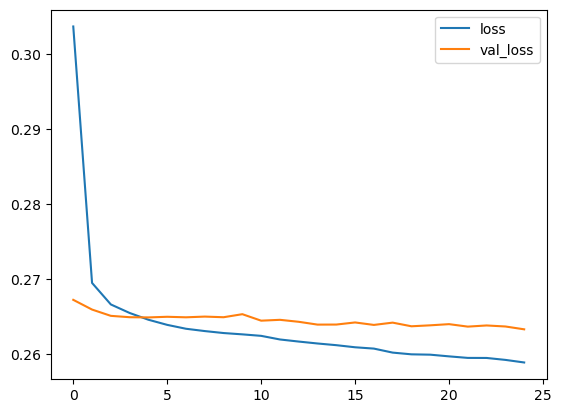

In [17]:
losses.plot()

In [18]:
from sklearn.metrics import classification_report,confusion_matrix


In [19]:
predictions = (model.predict(X_test) > 0.5).astype("int32")

2238/2238 [==============================] - 4s 2ms/step


In [20]:
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))


              precision    recall  f1-score   support

           0       0.96      0.45      0.61     14385
           1       0.88      1.00      0.93     57218

    accuracy                           0.89     71603
   macro avg       0.92      0.72      0.77     71603
weighted avg       0.89      0.89      0.87     71603

[[ 6413  7972]
 [  247 56971]]


In [21]:
##test the model by creating a rondom customer

In [22]:
import random

In [23]:
random.seed(101)
random_ind = random.randint(0,len(df))

In [24]:
df.columns

Index(['Unnamed: 0', 'loan_amnt', 'term', 'int_rate', 'installment',
       'annual_inc', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
       'pub_rec_bankruptcies', 'loan_repay', 'A2', 'A3', 'A4', 'A5', 'B1',
       'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3',
       'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5',
       'G1', 'G2', 'G3', 'G4', 'G5', 'verification_status_Not Verified',
       'verification_status_Source Verified', 'verification_status_Verified',
       'initial_list_status_f', 'initial_list_status_w',
       'application_type_DIRECT_PAY', 'application_type_INDIVIDUAL',
       'application_type_JOINT', 'purpose_car', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
       'purpose_medical', 'purpose_moving', 'purpose_other',
       'purpose_renew

In [25]:
new_customer = df.drop('loan_repay',axis=1).iloc[random_ind]

In [26]:
new_customer

Unnamed: 0      337106
loan_amnt      35000.0
term                60
int_rate         22.45
installment     975.64
                ...   
30723                0
48052                0
70466                1
86630                0
93700                0
Name: 336411, Length: 83, dtype: object

In [27]:
new_customer = scaler.transform(new_customer.values.reshape(1,83))

In [28]:
model.predict(new_customer)

1/1 [==============================] - 0s 23ms/step


array([[0.7270599]], dtype=float32)

In [29]:
df.iloc[random_ind]['loan_repay']

0